# Importations des bases

In [1]:
import pandas as pd

In [ ]:
#Lien vers la page kaggle où les données sont disponibles
# https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [2]:
fake = pd.read_csv("D:/Cours_AMSE/Machine_Learning/Fake.csv", header = 0 ,sep=",")

In [3]:
true = pd.read_csv("D:/Cours_AMSE/Machine_Learning/True.csv", header = 0 ,sep=",")

In [4]:
print(len(fake))
print(len(true))

23481
21417


In [5]:
fake.iloc[0,1]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Pré traitement des données

In [8]:
import re

In [9]:
#suppresion des caractères indésirables (@..., #...hashtags, les url, les auteurs à la fin: Photo by... )

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub('.@\w*. ','', fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub('.@\w*. ','', true.iloc[i,1])

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', fake.iloc[i,1], flags=re.MULTILINE)

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', true.iloc[i,1], flags=re.MULTILINE)

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub("pic.twitter.com.\w*", "",fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub("pic.twitter.com.\w*", "",true.iloc[i,1])
    
for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub('Featured image.*|Photo by.*|#\w*',"",fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub('Featured image.*|Photo by.*|#\w*',"",true.iloc[i,1])

# Description des données

In [10]:
'''En vue de donner les fonctions des mots (tagging) et d'identifier les mots les plus fréquents, on fusionne
les textes dans chaque base de données''' 

S_true= ""
for i in range (0,len(true)):
    S_true = S_true + true.iloc[i,1]

In [11]:
S_fake= ""
for i in range (0,len(fake)):
    S_fake = S_fake + fake.iloc[i,1]

In [12]:
#importation du package natural langage toolkit et de package pour tokenizer (séparer le texte en mots)

import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
##importation du package pour identifier les fonction des mots

nltk.download("averaged_perceptron_tagger")
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
tokenizer = nltk.RegexpTokenizer(r"\w+") ## on choisit une méthode de tokenization qui supprime la ponctuation
tokens_fake = tokenizer.tokenize(S_fake.lower()) ## tokenizer en suprimant la ponctuation et meetre en minuscule le texte
S_fake = nltk.Text(tokens_fake) 
tags_f = nltk.pos_tag(S_fake)  #attribuer la fonction de chaque mot

In [15]:
##importer un package qui compte les mots 

from collections import Counter
counts_tag_fake = Counter(tag for word,tag in tags_f)

In [16]:
##effectuer le compte dans la base fake

total_f = sum(counts_tag_fake.values())
d_f= dict((word, float(count)/total_f) for word,count in counts_tag_fake.items())

In [17]:
tokens_true = tokenizer.tokenize(S_true.lower())
S_true = nltk.Text(tokens_true)
tags_t = nltk.pos_tag(S_true)

In [18]:
counts_tag_true = Counter(tag for word,tag in tags_t)

In [19]:
##faire le total de chaque fonction de mots : i.e : compter tous les noms 

total_t = sum(counts_tag_true.values())
d_t= dict((word, float(count)/total_f) for word,count in counts_tag_true.items())

In [20]:
##ici on regroupe toutes les formes de mots de fonctions(function word: pronoms,prépositions...) d'adjectif, d'adverbes, de noms, de verbe



fw_t = d_t["IN"]+ d_t["PRP"]+d_t["PRP$"]+d_t["WP"]+d_t["WP$"]+d_t["DT"]+d_t["PDT"]+d_t["MD"]+d_t["WDT"]+d_t["UH"]+d_t["POS"]+d_t["TO"]+d_t["EX"]
adj_t = d_t["JJ"]+ d_t["JJR"]+d_t["JJS"]
adv_t= d_t["RB"]+ d_t["RBR"]+d_t["RBS"]+d_t["WRB"]
nn_t = d_t["NN"]+d_t["NNS"]+d_t["NNP"]+d_t["NNPS"]
v_t = d_t["RP"]+d_t["VB"]+d_t["VBD"]+d_t["VBG"]+d_t["VBN"]+d_t["VBP"]+d_t["VBZ"]

fw_f = d_f["IN"]+d_f["PRP"]+d_f["PRP$"]+d_f["WP"]+d_f["WP$"]+d_f["DT"]+d_f["PDT"]+d_f["MD"]+d_f["WDT"]+d_f["UH"]+d_f["POS"]+d_f["TO"]+d_f["EX"]
adj_f = d_f["JJ"]+d_f["JJR"]+d_f["JJS"]
adv_f= d_f["RB"]+d_f["RBR"]+d_f["RBS"]+d_f["WRB"]
nn_f = d_f["NN"]+d_f["NNS"]+d_f["NNP"]+d_f["NNPS"]
v_f = d_f["RP"]+d_f["VB"]+d_f["VBD"]+d_f["VBG"]+d_f["VBN"]+d_f["VBP"]+d_f["VBZ"]

'''function word: préposition: in
pronoun: PRR
possessive pronon : PRP$
possessive wh-pronoun whose :WP$ 
wh-pronoun who, what: WP
cojonction de corrd : CC
determiner : DT 
predeterminer : PDT
modal:MD
wh-determiner : WDT
interjection : UH
possessive ending POS
TO : to
existential there: EX 

Content word : Content words are words with specific meanings, such as nouns, adjectives, adverbs, and main verbs

adjectives:JJ
adjective, comparative: JJR 
adjective, superlative: JJS 
wh-adverb where, when : WRB 

noun, singular: NN 
noun plural : NNS
proper noun, singular : NNP
proper noun, plural ‘Americans’ : NNPS

adverb very, silently, :RB 
adverb, comparative better: RBR 
adverb, superlative best: RBS 

particle give up :RP 
verb, base form : VB
verb, past tense, took :VBD
verb, gerund/present participle taking:VBG 

verb, past participle is taken:VBN 
verb, sing. present, known-3d take:VBP 
verb, 3rd person sing. present takes:VBZ'''
 

'function word: préposition: in\npronoun: PRR\npossessive pronon : PRP$\npossessive wh-pronoun whose :WP$ \nwh-pronoun who, what: WP\ncojonction de corrd : CC\ndeterminer : DT \npredeterminer : PDT\nmodal:MD\nwh-determiner : WDT\ninterjection : UH\npossessive ending POS\nTO : to\nexistential there: EX \n\nContent word : Content words are words with specific meanings, such as nouns, adjectives, adverbs, and main verbs\n\nadjectives:JJ\nadjective, comparative: JJR \nadjective, superlative: JJS \nwh-adverb where, when : WRB \n\nnoun, singular: NN \nnoun plural : NNS\nproper noun, singular : NNP\nproper noun, plural ‘Americans’ : NNPS\n\nadverb very, silently, :RB \nadverb, comparative better: RBR \nadverb, superlative best: RBS \n\nparticle give up :RP \nverb, base form : VB\nverb, past tense, took :VBD\nverb, gerund/present participle taking:VBG \n\nverb, past participle is taken:VBN \nverb, sing. present, known-3d take:VBP \nverb, 3rd person sing. present takes:VBZ'

In [21]:
import matplotlib.pyplot as plt
import numpy as np

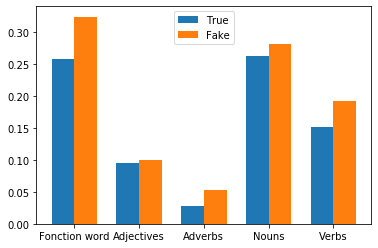

In [22]:
##on représente toutes ces types de mots sous formes de barplot

group = ["Fonction word", "Adjectives", "Adverbs", "Nouns","Verbs"]
bar_t = [fw_t,adj_t,adv_t,nn_t,v_t]
bar_f = [fw_f,adj_f,adv_f,nn_f,v_f]
# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(group))
# Largeur des barres
largeur = .35
# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots()
r1 = ax.bar(position - largeur/2,bar_t , largeur, label = "True")
r2 = ax.bar(position + largeur/2,bar_f , largeur,label = "Fake")
# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(group)
plt.legend(loc = "upper center")
plt.savefig('description.png')

In [23]:
##importer le package pour supprimer les stopwords et tokenizer

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
##spécifier qu'on veut des stopword anglais
stop_words = set(stopwords.words('english'))

In [25]:
##filtrer les stopwords

stop_words = set(stopwords.words('english'))
filtered_fake = [] 
  
for w in S_fake: 
    if w not in stop_words: 
        filtered_fake.append(w)

In [26]:
import collections
counts_nsw_f = collections.Counter(filtered_fake)

In [27]:
filtered_true = [] 
  
for w in S_true: 
    if w not in stop_words: 
        filtered_true.append(w)

In [28]:
##compter combien de fois chaque mot revient

counts_nsw_t = collections.Counter(filtered_true)

In [29]:
##regrouper dans dans un dataframe les 10 mots les  plus fréquents avec leurs effectifs respectifs

count_mc_f = pd.DataFrame(counts_nsw_f.most_common(10),
                             columns=['words', 'count'])
count_mc_f.head()

,words,count
0,trump,78985
1,said,33743
2,president,27591
3,people,26547
4,one,24470


In [30]:
count_mc_t = pd.DataFrame(counts_nsw_t.most_common(10),
                             columns=['words', 'count'])
count_mc_t.head()

,words,count
0,said,99059
1,trump,54693
2,u,44569
3,would,31604
4,reuters,28976


# Visualisation des données

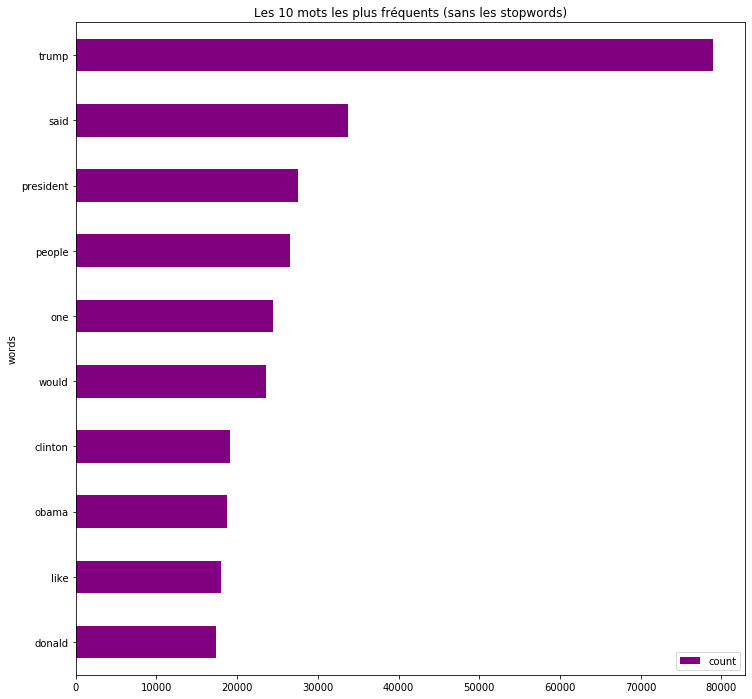

<Figure size 432x288 with 0 Axes>

In [31]:
##représentation graphique des effectifs des mots les  plus fréquents dans la base des fake news

fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_f.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Les 10 mots les plus fréquents (sans les stopwords)")

plt.show()

plt.savefig('fake_words.png')

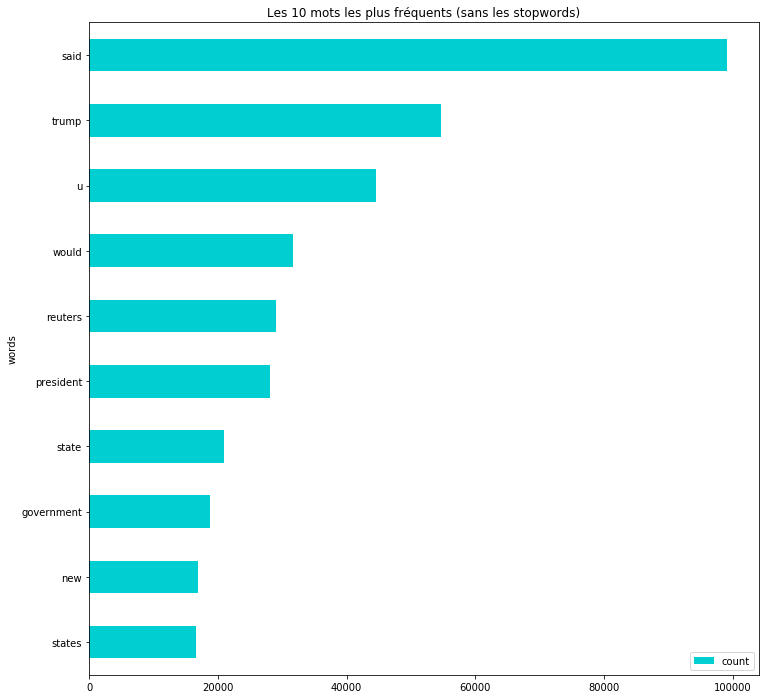

<Figure size 432x288 with 0 Axes>

In [32]:
##représentation graphique des effectifs des mots les  plus fréquents dans la base des true news

fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_t.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="darkturquoise")

ax.set_title("Les 10 mots les plus fréquents (sans les stopwords)")

plt.show()
plt.savefig('truee_words.png')

# Préparation des données pour la classification 

In [33]:
#ajoutons à chaque base, la variable  Nature pour indiquer si l'info est vraie ou fausse

fake['Nature'] = "faux"
true['Nature'] = "vrai"

In [34]:
#fusionner les deux bases 

mabase = fake.append(true,ignore_index=True)

In [35]:
##tokenization and lowercasing

mabase['tokenized_text'] = mabase.apply(lambda row: tokenizer.tokenize((row['text']).lower()) , axis=1)

In [36]:
##stopwords removing

mabase['wst_text'] = mabase['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [37]:
#importer la base pour la lemmatisation (stemming)

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [38]:
##stemming

mabase['stem_text'] = mabase['wst_text'].apply(lambda x: [ps.stem(y) for y in x])

In [39]:
list(mabase)

['title',
 'text',
 'subject',
 'date',
 'Nature',
 'tokenized_text',
 'wst_text',
 'stem_text']

In [40]:
mabase.iloc[0,7]

['donald',
 'trump',
 'wish',
 'american',
 'happi',
 'new',
 'year',
 'leav',
 'instead',
 'give',
 'shout',
 'enemi',
 'hater',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'realiti',
 'show',
 'star',
 'one',
 'job',
 'countri',
 'rapidli',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happi',
 'healthi',
 'new',
 'year',
 'presid',
 'angri',
 'pant',
 'tweet',
 '2018',
 'great',
 'year',
 'america',
 'countri',
 'rapidli',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happi',
 'healthi',
 'new',
 'year',
 '2018',
 'great',
 'year',
 'america',
 'donald',
 'j',
 'trump',
 'decemb',
 '31',
 '2017trump',
 'tweet',
 'went',
 'welll',
 'expect',
 'kind',
 'presid',
 'send',
 'new',
 'year',
 'greet',
 'like',
 'despic',
 'petti',
 'infantil',
 'gibberish',
 'trump',
 'lack',
 '

In [41]:
## lorsqu'on passe ensuite à la classification en utilisant directement cette colonne 'stem_text' une erreur est générée car 
## car 'stem_text' contient des listes. pour éviter cela nous ramenons les listes contenues dans cette colonne sous forme de 
## de texte. Pour cela nous créons une nouvelle variable qui va contenir le texte lemmatisé 

mabase['re_stem_text']=""

In [42]:
for i in range (0,len(mabase)):
    mabase.iloc[i,8] = " ".join(mabase.iloc[i,7])

In [43]:
x = mabase['re_stem_text']
y = mabase.Nature
len(y)

44898

# Les différentes méthodes de classification

In [44]:
##construction d'une fonction de graphique pour les matrices de confusion
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment = 'bottom',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
##importation des differents packages nécessaires

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [46]:
##méthode de Multinomial Naive Bayesian. Pipeline va permettre de réalisation la tranformartion des données avec tfidf et
##de d'apprêter la methode de classification

clf_mlb = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('mlb',MultinomialNB())])

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

[0.99331997 0.98841871 0.99175947 0.99153675 0.98129176 0.99465479
 0.99487751 0.9966585  0.99710403 0.98061929]
Accuracy: 0.99 (+/- 0.01)
Confusion matrix, without normalization


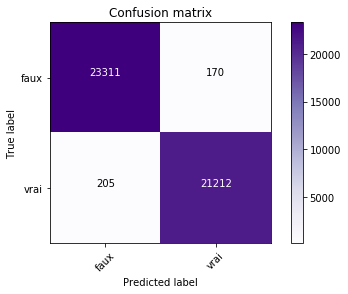

In [63]:
#### méthode de decision tree

clf_dt = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('dt',tree.DecisionTreeClassifier())]) 
score_dt = cross_val_score(clf_dt,x,y,cv=10,scoring='accuracy')
print(score_dt)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))
y_pred = cross_val_predict(clf_dt,x , y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai']) ##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Purples et color="white"
plt.savefig('dt_mat.png')

C:\Users\manar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.98574928 0.98262806 0.98552339 0.96993318 0.95701559 0.9830735
 0.97861915 0.97816886 0.98730229 0.96925819]
Accuracy: 0.98 (+/- 0.02)


C:\Users\manar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization


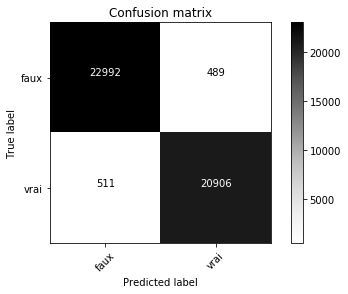

In [66]:
#### regression logistic

clf_lr = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('lr',LogisticRegression())]) 
score_lr = cross_val_score(clf_lr,x,y,cv=10,scoring='accuracy')
print(score_lr)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))
y_pred = cross_val_predict(clf_lr,x , y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai'])  ##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Greys et color="white"
plt.savefig('lr_mat.png')

[0.9904253  0.98864143 0.9908686  0.98240535 0.97728285 0.99175947
 0.99109131 0.993317   0.9973268  0.98351526]
Confusion matrix, without normalization


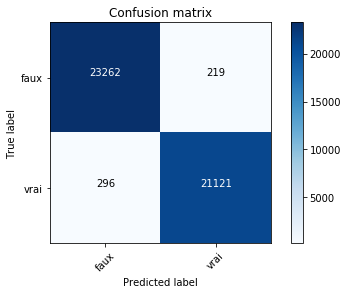

In [68]:
#### méthode de PassiveAggrssiveClassifier


clf_pac = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('pac',PassiveAggressiveClassifier())]) 
score_pac = cross_val_score(clf_pac,x,y,cv=10,scoring='accuracy')
print(score_pac)
y_pred = cross_val_predict(clf_pac,x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai'])##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Blues et color="white"
plt.savefig('pac_mat.png')

In [69]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_pac.mean(), score_pac.std() * 2))

Accuracy: 0.99 (+/- 0.01)


# Pour aller plus loin, méthode LDA pour la recheche des sujets les plus fréquents

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2,
                                   max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(mabase['re_stem_text'])

In [89]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [90]:
## ici on essaie de mettre en oeuvre la méthode LDA pour la détection de thématiques, afin d'aller au delà de l'objectif de 
## classification et pour mieux comprendre la base de données dont nous disposons. Il faudra réexcuter cette section pour voir
## le graohique interactif 

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [91]:
tf_feature_names = tfidf_vectorizer.get_feature_names()
tf_feature_names[100:103]

['attorney', 'august', 'author']

In [92]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[- n_top_words - 1:][::-1]]))
    print()

In [93]:
##thématiques les plus fréquentes

lda.fit(tfidf)
print_top_words(lda, tf_feature_names, 10)

Topic #0:
parti elect vote trump republican said democrat poll clinton percent voter
Topic #1:
gun cruz ted shoot control weapon mass check amend texa violenc
Topic #2:
decemb 2016 14 moscow octob beij flynn 13 12 intern paul
Topic #3:
trump russian clinton russia investig said intellig fbi email elect presid
Topic #4:
turkey johnson flynn diplomat michael kid financi myanmar syrian billion iraqi
Topic #5:
said tax trump senat republican would bill hous state myanmar govern
Topic #6:
billion global financ economi transit econom financi britain 25 diplomat milit
Topic #7:
said polic kill peopl year attack reuter arrest citi govern group
Topic #8:
said korea minist china state north reuter iran unit eu presid
Topic #9:
trump peopl presid like obama hillari one say go donald said



In [94]:
tr = lda.transform(tfidf)
tr[:5]

array([[0.01509789, 0.01509559, 0.11844733, 0.0150973 , 0.01509383,
        0.01509793, 0.01509384, 0.01509732, 0.01509702, 0.76078195],
       [0.01044893, 0.01044605, 0.01044661, 0.90597233, 0.01044605,
        0.01044855, 0.01044605, 0.01044823, 0.01044833, 0.01044887],
       [0.01486256, 0.01485895, 0.10316009, 0.01486759, 0.01485895,
        0.01486305, 0.01485895, 0.01486741, 0.01486194, 0.77794051],
       [0.01215831, 0.01215542, 0.07623945, 0.01215984, 0.01215542,
        0.01215853, 0.01215542, 0.01215839, 0.01215813, 0.82650109],
       [0.01071555, 0.01071288, 0.01071288, 0.0107151 , 0.01071288,
        0.01071602, 0.01071288, 0.36974379, 0.01071891, 0.54453911]])

In [95]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [97]:
##représentation du graphique interactif

pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

C:\Users\manar\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.072978 -0.004790       1        1  28.113156
5     -0.082315 -0.004252       2        1  17.006739
8     -0.082393  0.001709       3        1  14.827332
7     -0.076175 -0.011036       4        1  13.416746
3     -0.093377  0.000503       5        1  11.124753
0     -0.082129 -0.008268       6        1  10.427181
1      0.303881 -0.264881       7        1   1.400599
4      0.263109  0.297286       8        1   1.273279
2     -0.039521 -0.002403       9        1   1.217713
6     -0.038102 -0.003868      10        1   1.192501, topic_info=    Category         Freq        Term        Total  loglift  logprob
930  Default  2402.000000      turkey  2402.000000  30.0000  30.0000
410  Default  1374.000000         gun  1374.000000  29.0000  29.0000
252  Default  1309.000000      decemb  1309.000000  28.0000  28.0000
238  Default  1232.000000        cruz  1232.000000  27.0000  27.0000
480  Default  1070.000000     johnson  1070.000000  26.0000  26.0000
16   Default   722.000000        2016   722.000000  25.0000  25.0000
889  Default   504.000000         ted   504.000000  24.0000  24.0000
823  Default   396.000000       shoot   396.000000  23.0000  23.0000
217  Default   468.000000     control   468.000000  22.0000  22.0000
967  Default   316.000000      weapon   316.000000  21.0000  21.0000
952  Default   381.000000     violenc   381.000000  20.0000  20.0000
187  Default  1151.000000     clinton  1151.000000  19.0000  19.0000
669  Default   717.000000       polic   717.000000  18.0000  18.0000
783  Default   634.000000     russian   634.000000  17.0000  17.0000
168  Default   240.000000       check   240.000000  16.0000  16.0000
896  Default   268.000000        texa   268.000000  15.0000  15.0000
556  Default   231.000000        mass   231.000000  14.0000  14.0000
782  Default   652.000000      russia   652.000000  13.0000  13.0000
299  Default  1150.000000       elect  1150.000000  12.0000  12.0000
650  Default  1039.000000       parti  1039.000000  11.0000  11.0000
798  Default   334.000000      second   334.000000  10.0000  10.0000
68   Default   236.000000       amend   236.000000   9.0000   9.0000
927  Default  3336.000000       trump  3336.000000   8.0000   8.0000
6    Default   211.000000          14   211.000000   7.0000   7.0000
494  Default   450.000000       korea   450.000000   6.0000   6.0000
956  Default   899.000000        vote   899.000000   5.0000   5.0000
757  Default  1195.000000  republican  1195.000000   4.0000   4.0000
466  Default   626.000000    investig   626.000000   3.0000   3.0000
172  Default   491.000000       china   491.000000   2.0000   2.0000
673  Default   418.000000        poll   418.000000   1.0000   1.0000
..       ...          ...         ...          ...      ...      ...
752  Topic10     3.848409      repeal   145.735491   0.7950  -6.9077
126  Topic10     3.848825     billion   363.798386  -0.1197  -6.9076
396  Topic10     3.848824      global   218.203986   0.3915  -6.9076
356  Topic10     3.848789      financ   192.406490   0.5173  -6.9077
294  Topic10     3.848776     economi   242.830345   0.2845  -6.9077
921  Topic10     3.848753     transit   180.203128   0.5828  -6.9077
293  Topic10     3.848735      econom   318.200055   0.0142  -6.9077
357  Topic10     3.848667     financi   269.907341   0.1788  -6.9077
138  Topic10     3.848661     britain   296.252953   0.0856  -6.9077
20   Topic10     3.848633          25   182.765184   0.5686  -6.9077
275  Topic10     3.848622    diplomat   220.808604   0.3795  -6.9077
578  Topic10     3.848620       milit   282.897821   0.1317  -6.9077
632  Topic10     3.848614         oil   231.070230   0.3341  -6.9077
512  Topic10     3.848591        leak   151.769572   0.7545  -6.9077
390  Topic10     3.848559      german   200.743362   0.4748  -6.9077
692  Topic10     3.848551     primari   176.563496   0.6031  -6.90